In [21]:
import os
import sys
import timeit

import numpy

import theano
import theano.tensor as T
from theano.tensor.signal import downsample
from theano.tensor.nnet import conv
import sys
sys.path.append("../lib")
from load import faces
import dlib
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.cm as cm
import scipy.ndimage

In [2]:
trX, teX, trY, teY  = faces(onehot = False)

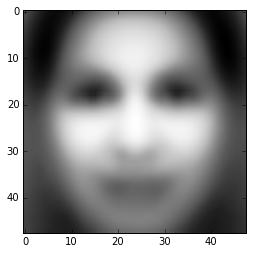

In [98]:



A = numpy.mean(trX , axis = 0);

A = A.reshape(48, 48)
imshow(A,cmap = cm.Greys_r)


In [99]:
facePredictor = "/datasets/sagarj/dlib_shapepredictor/shape_predictor_68_face_landmarks.dat"


In [100]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(facePredictor)

In [119]:
points = numpy.zeros((100,68,2));
for i in range(0,100):
    img = trX[i].reshape(48,48)
    #imshow(img,cmap = cm.Greys_r)
    #mask = numpy.zeros((48,48))
    dets = detector(img, 1)
    
    
    for k, d in enumerate(dets):
        shape = predictor(img, d)
        for j in range (0 , 68):
            points[i][j][0] = shape.part(j).x
            points[i][j][1] = shape.part(j).y
            

#imshow(img2,cmap = cm.Greys_r)



In [129]:
print points[85]

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


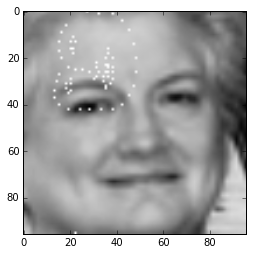

In [97]:
for k, d in enumerate(dets):
        shape = predictor(img, d)
        for i in range (0 , 68):
            #print "yaay " + str(shape.part(i))
            pt = shape.part(i)
            img2[pt.x][pt.y] = 255
            

imshow(img2,cmap = cm.Greys_r)